# InitialDataAnalysis

Read in data and get into the correct format for MiniSom

Perform K-means to get an estimate of number of clusters

Code adapted from https://www.kaggle.com/code/kaushikmajumder/alllife-bank-credit-card-customer-segmentation/notebook

In [104]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

### Load data file

Delete named columns

Save metabolote names for later

In [109]:
arr_data_pd = pd.read_csv("./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master-SOM.csv", skiprows=1, header=None)
metabolites = arr_data_pd[0]
arr_data_pd=arr_data_pd.drop(arr_data_pd.columns[[0, 1]], axis=1)

In [111]:
arr_data_pd.head(5)
arr_raw_data_pd = arr_data_pd.copy()

,2,3,4,5,6,7,8,9
0,1.19,1.32,0.86,0.68,0.54,1.84,3.23,3.63
1,0.87,1.26,0.98,0.67,0.53,4.94,3.67,12.75
2,1.31,1.45,1.18,1.22,0.52,0.59,0.31,0.26
3,1.61,0.72,0.68,1.91,1.42,3.30,0.90,1.40
4,0.75,1.08,0.80,0.55,0.39,0.21,0.87,1.62


### Scale data

In [45]:
scaler = StandardScaler()
arr_data_pd_scaled = scaler.fit_transform(arr_data_pd.iloc[:,1:-1])

### Plot elbow curve

/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

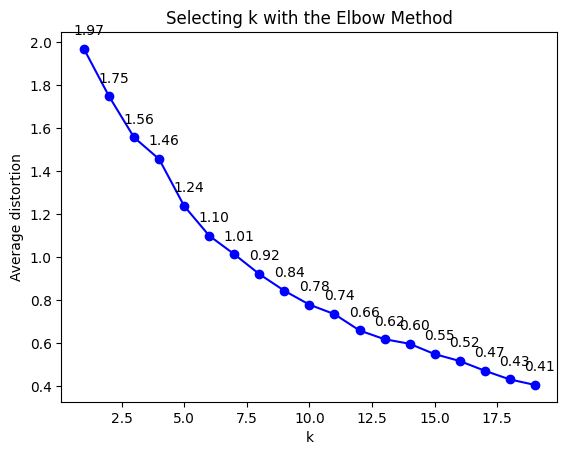

In [48]:
clusters = range(1, 20)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(arr_data_pd_scaled)
    prediction = model.predict(arr_data_pd_scaled)
    distortion = (
        sum(
            np.min(cdist(arr_data_pd_scaled, model.cluster_centers_, "euclidean"), axis=1)
        )
        / arr_data_pd_scaled.shape[0]
    )

    meanDistortions.append(distortion)


plt.plot(clusters, meanDistortions, "bo-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
for x,y in zip(clusters, meanDistortions):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x + 0.2,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

Looks like about 4-5 clusters

### Confirm with Silhouette Score

/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

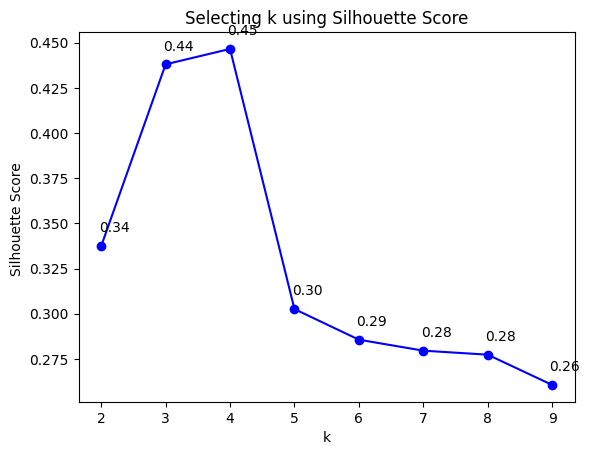

In [50]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((arr_data_pd_scaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(arr_data_pd_scaled, preds)
    sil_score.append(score)
    

plt.plot(cluster_list, sil_score, "bo-")
plt.xlabel("k")
plt.ylabel("Silhouette Score ")
plt.title("Selecting k using Silhouette Score")
for x,y in zip(cluster_list, sil_score):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x + 0.2,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

Looks like 4 clusters

### Build model with 4 clusters

In [90]:
kmeans = KMeans(n_clusters=4, random_state=0)
optimal_model = kmeans.fit(arr_data_pd_scaled)

/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Add cluster numbers

In [91]:
arr_data_pd['cluster'] = kmeans.labels_
arr_data_pd['metabolite'] = metabolites
arr_data_pd.head(5)

,2,3,4,5,6,7,8,9,cluster,metabolite
0,1.19,1.32,0.86,0.68,0.54,1.84,3.23,3.63,2,PYRUVATE
1,0.87,1.26,0.98,0.67,0.53,4.94,3.67,12.75,2,LACTATE
2,1.31,1.45,1.18,1.22,0.52,0.59,0.31,0.26,1,ETHANOL-AMINE
3,1.61,0.72,0.68,1.91,1.42,3.30,0.90,1.40,3,GLYCEROL
4,0.75,1.08,0.80,0.55,0.39,0.21,0.87,1.62,1,SUC


### Print out cluster contents

In [92]:
for n in range(0, 4):
    print("Cluster ", n)
    for i in range(0, arr_data_pd.shape[0]):
        if (arr_data_pd.loc[i, 'cluster'] == n):
            print(arr_data_pd.loc[i,'metabolite'])

Cluster  0
LYS
TYR
URATE
TRP
PHE
Cluster  1
ETHANOL-AMINE
SUC
GLYCERATE
FUM
CADAVERINE
MAL
4-AMINO-BUTYRATE
CYS
2-KETOGLUTARATE
CIS-ACONITATE
PUTRESCINE
SHIKIMATE
CIT
FRU
GLUCOSE
GLUCONATE
CPD0-1083
SUCROSE
TREHALOSE
L-ASPARTATE
ASN
SER
GLY
L-ALPHA-ALANINE
GLT
GLN
THR
PRO
VAL
ILE
LEU
FORMATE
FOLATES
Cluster  2
PYRUVATE
LACTATE
Cluster  3
GLYCEROL


### Compare with kim_analysis_2007

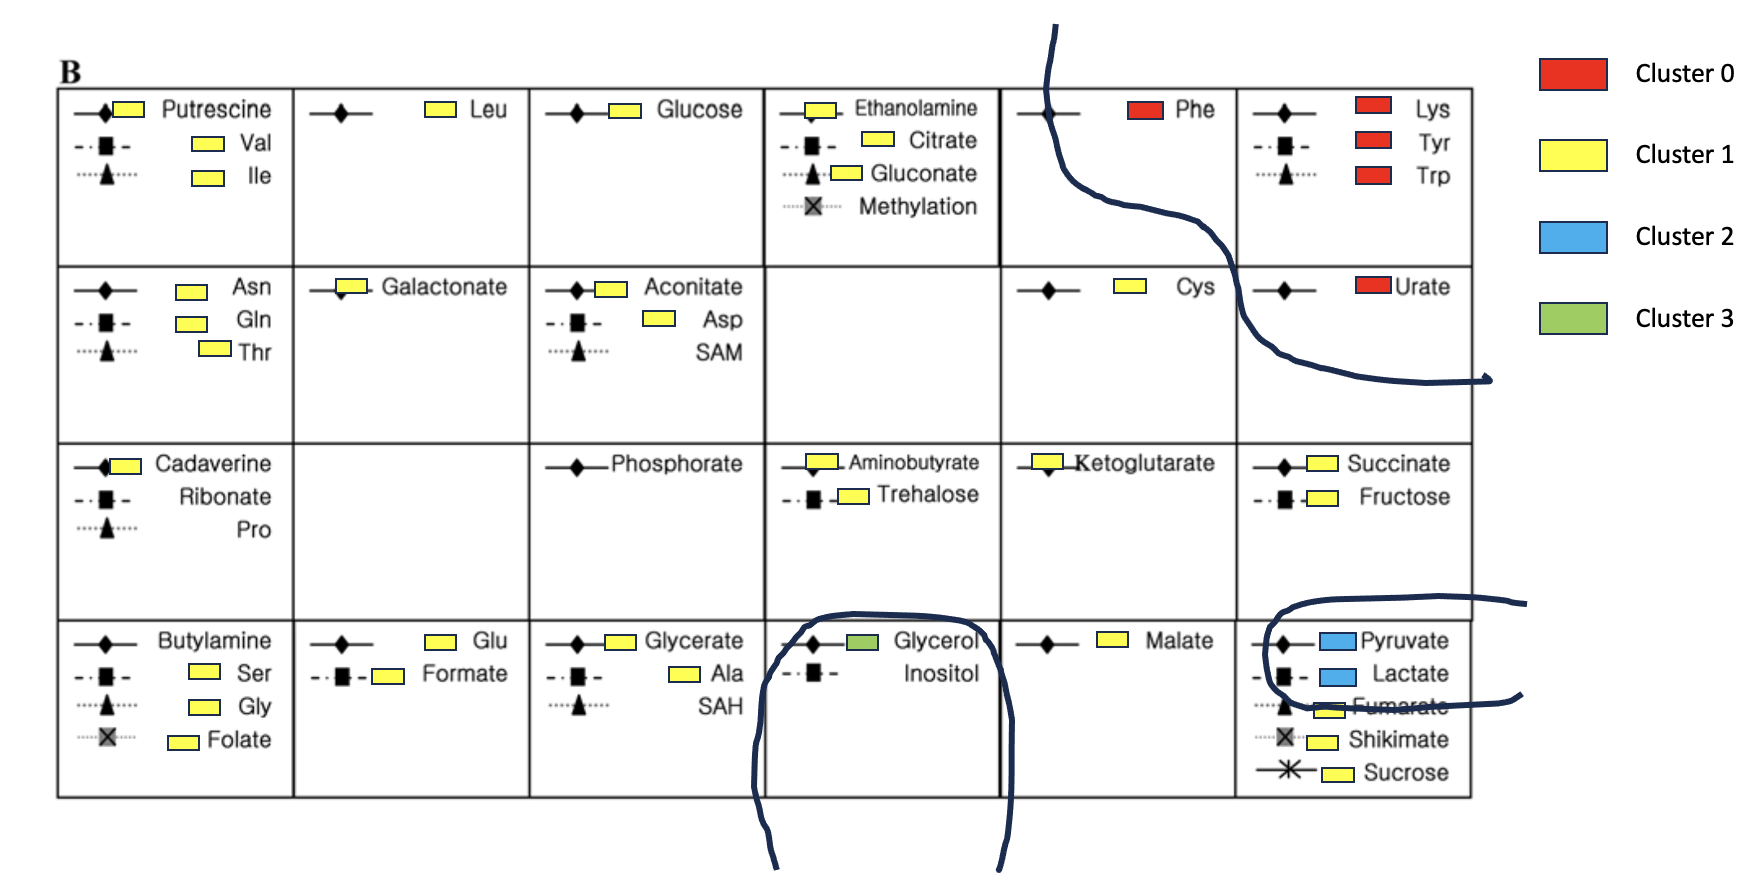

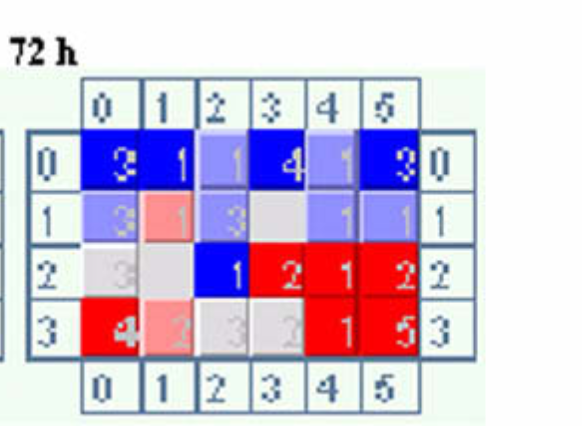

### Davies-Bouldin score

Represents the average 'similarity' of clusters

Lower value is better

Needs labelled data

In [113]:
db_score = davies_bouldin_score(arr_raw_data_pd, kmeans.labels_)
print(db_score)

0.9221030693491143


As a double-check lets try applying DB score to a couple of other cluster sizes

Try K=3

In [116]:
kmeans = KMeans(n_clusters=3, random_state=0)
optimal_model = kmeans.fit(arr_data_pd_scaled)
arr_data_pd['cluster'] = kmeans.labels_
arr_data_pd['metabolite'] = metabolites
arr_data_pd.head(5)
db_score = davies_bouldin_score(arr_raw_data_pd, kmeans.labels_)
print(db_score)

1.0270586109098465


/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=3 is worse

Try K=5

In [118]:
kmeans = KMeans(n_clusters=5, random_state=0)
optimal_model = kmeans.fit(arr_data_pd_scaled)
arr_data_pd['cluster'] = kmeans.labels_
arr_data_pd['metabolite'] = metabolites
arr_data_pd.head(5)
db_score = davies_bouldin_score(arr_raw_data_pd, kmeans.labels_)
print(db_score)

1.3384245943913227


/Users/johnpearce/opt/miniconda3/envs/SOM/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=5 is also worse ... so K=4 is at least a local optimisation